## This is a template for testing out the dynamics of a real-world networks under the budget condition

In [4]:
import sys
import os
sys.path.append('../../src')
import networkx as nx
import exp_env as env
import copy
import pickle

In [5]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)

# Load the graph from the file

# other networks:
# save_path = '../../network_data/facebook.gpickle'
save_path = '../../network_data/ca-GrQc.gpickle'
# save_path = '../../network_data/ca-GrQc.gpickle'

try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from ../network_data/ca-GrQc.gpickle


In [6]:
model = env.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 431
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4811
influencer {6919, 24214, 14746, 283, 5542, 13990, 7477, 18489, 188, 5181, 15300, 1353, 25676, 23759, 17874, 23513, 19683, 22244, 10358, 18297}


### Cascade Step = 2

In [ ]:
budget_list = list(range(1, 201))
deinfluencers_list = env.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = env.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=2)
env.plot_deinfluencer_results_exp2(results, G)

### Cascade Step = 3

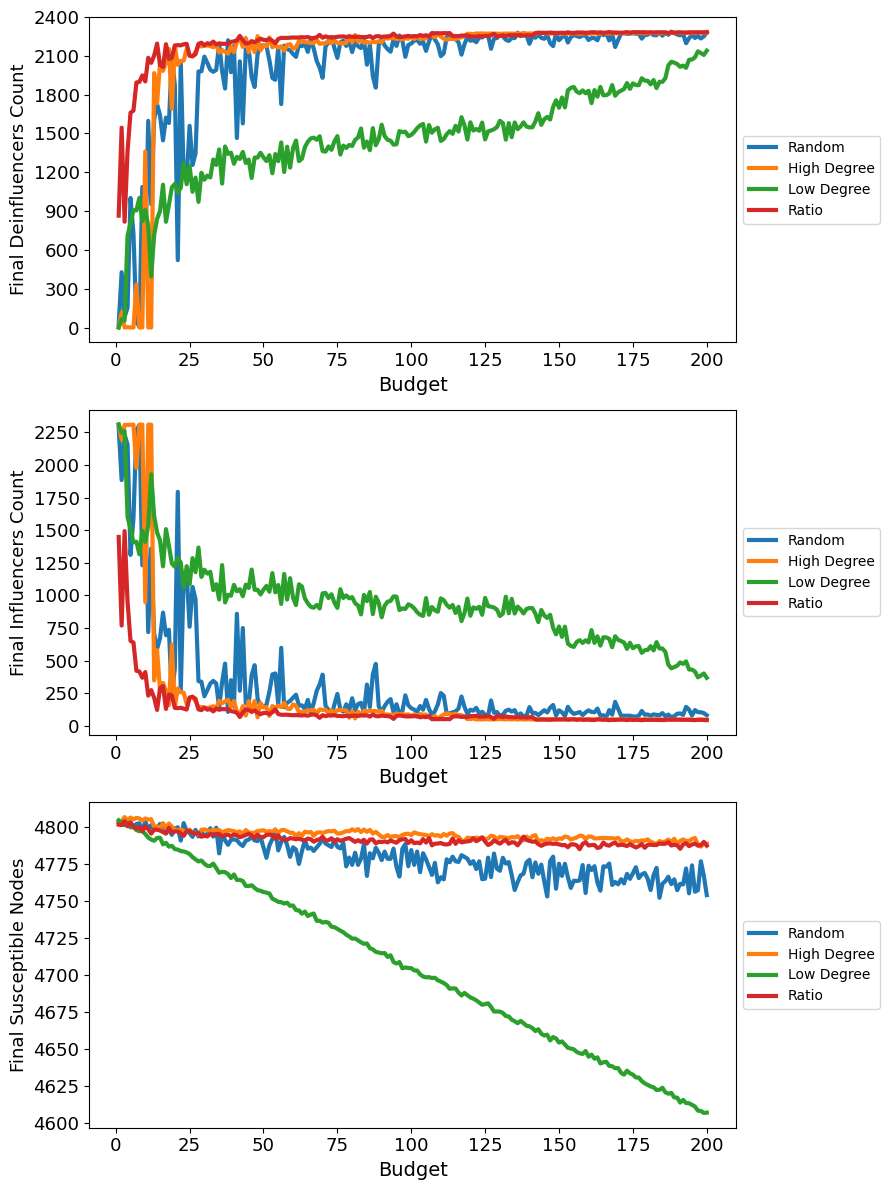

In [5]:
budget_list = list(range(1, 201))
deinfluencers_list = env.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = env.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)
env.plot_deinfluencer_results_exp2(results, G)

### Cascade step = 4

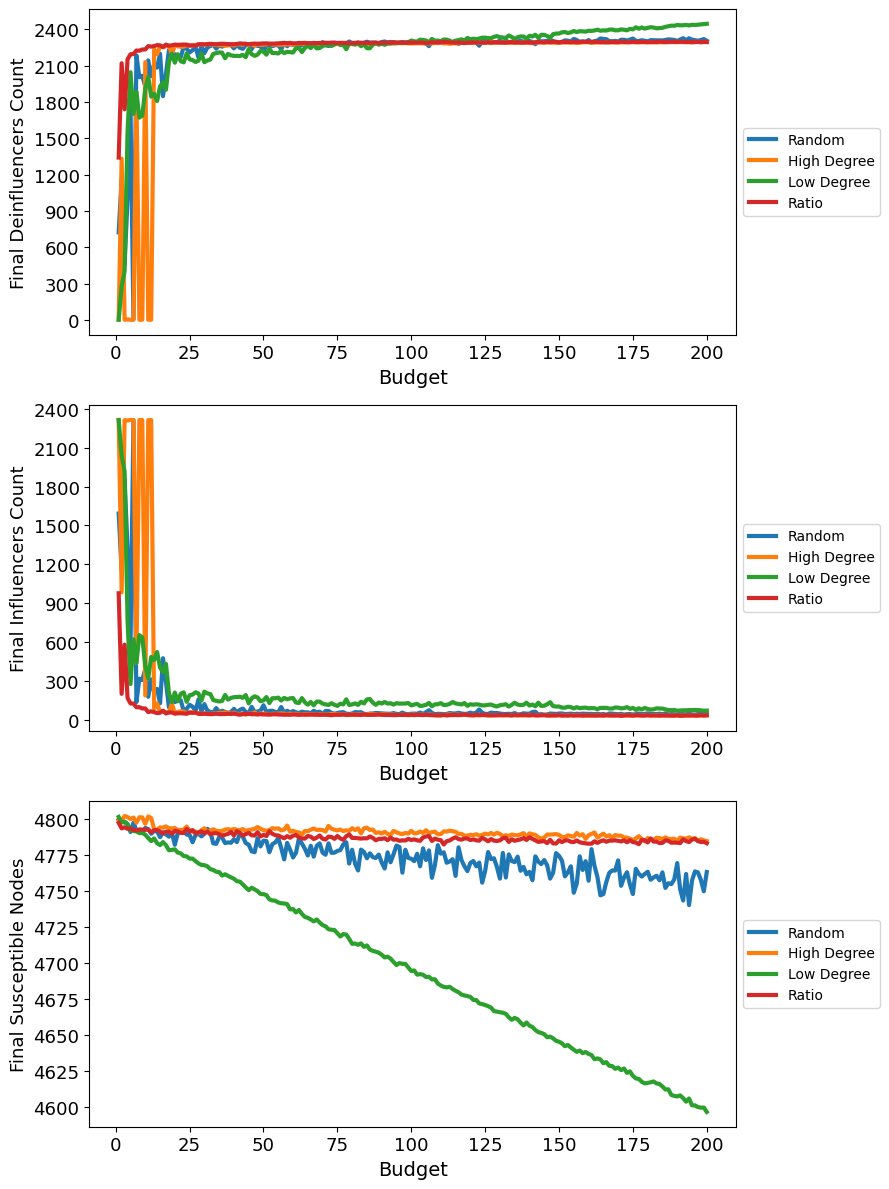

In [6]:
budget_list = list(range(1, 201))
deinfluencers_list = env.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = env.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=4)
env.plot_deinfluencer_results_exp2(results, G)

## Having Larger Budget
### Cascade step = 3

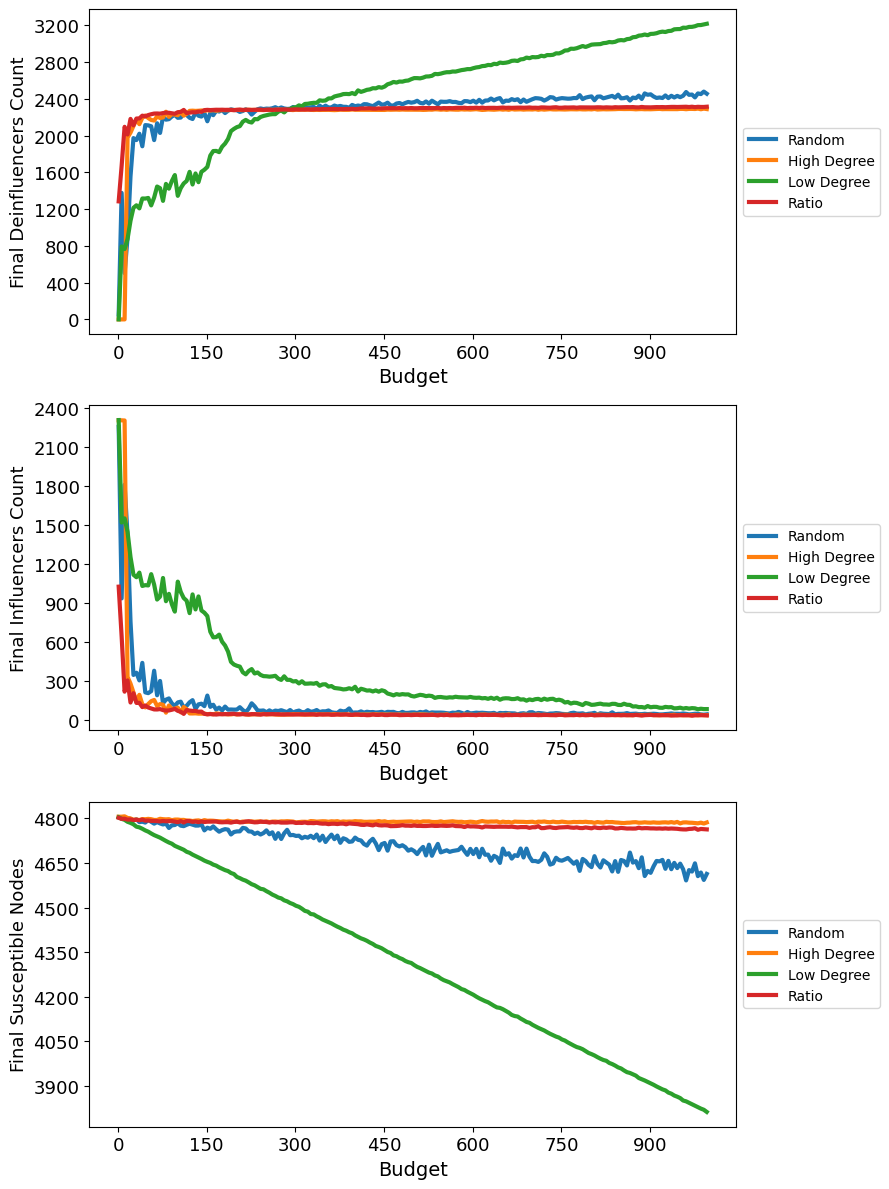

In [7]:
budget_list = list(range(1, 1001, 5))
deinfluencers_list = env.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = env.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)
env.plot_deinfluencer_results_exp2(results, G)